In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sal_train = pd.read_csv("../Assignment 17-Support Vector Machines/SalaryData_Train.csv")

In [3]:
sal_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [4]:
sal_test = pd.read_csv("../Assignment 17-Support Vector Machines/SalaryData_Test.csv")

In [5]:
sal_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [6]:
combined_data = pd.concat([sal_train, sal_test], axis=0)
combined_data

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
15055   33            Private   Bachelors           13        Never-married   
15056   39            Private   Bachelors           13             Divorced   
15057   38            Private   Bachelors           13   Married-civ-spouse   
15058   44            Private   Bachelors           13             Divorced   
15059   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [8]:
combined_data.describe().T

count         mean          std   min   25%   50%   75%  \
age           45221.0    38.548086    13.217981  17.0  28.0  37.0  47.0   
educationno   45221.0    10.118463     2.552909   1.0   9.0  10.0  13.0   
capitalgain   45221.0  1101.454700  7506.511295   0.0   0.0   0.0   0.0   
capitalloss   45221.0    88.548617   404.838249   0.0   0.0   0.0   0.0   
hoursperweek  45221.0    40.938038    12.007640   1.0  40.0  40.0  45.0   

                  max  
age              90.0  
educationno      16.0  
capitalgain   99999.0  
capitalloss    4356.0  
hoursperweek     99.0

In [9]:
combined_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
combined_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057     True
15058    False
15059    False
Length: 45221, dtype: bool

In [11]:
combined_data[combined_data.duplicated(keep=False)]

age workclass      education  educationno        maritalstatus  \
2       38   Private        HS-grad            9             Divorced   
12      23   Private      Bachelors           13        Never-married   
16      32   Private        HS-grad            9        Never-married   
19      40   Private      Doctorate           16   Married-civ-spouse   
25      19   Private        HS-grad            9        Never-married   
...    ...       ...            ...          ...                  ...   
15044   22   Private   Some-college           10        Never-married   
15049   32   Private        HS-grad            9   Married-civ-spouse   
15052   31   Private        HS-grad            9   Married-civ-spouse   
15053   25   Private        HS-grad            9        Never-married   
15057   38   Private      Bachelors           13   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
2       Handlers-cleaners   Not-in-family   White     Male            0   
12           Adm-clerical       Own-child   White   Female            0   
16      Machine-op-inspct       Unmarried   White     Male            0   
19         Prof-specialty         Husband   White     Male            0   
25           Craft-repair       Own-child   White     Male            0   
...                   ...             ...     ...      ...          ...   
15044        Craft-repair       Own-child   White     Male            0   
15049   Handlers-cleaners         Husband   White     Male            0   
15052        Craft-repair         Husband   White     Male            0   
15053       Other-service       Own-child   White   Female            0   
15057      Prof-specialty         Husband   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
2                0            40   United-States   <=50K  
12               0            30   United-States   <=50K  
16               0            40   United-States   <=50K  
19               0            60   United-States    >50K  
25               0            40   United-States   <=50K  
...            ...           ...             ...     ...  
15044            0            40   United-States   <=50K  
15049            0            40   United-States   <=50K  
15052            0            40   United-States   <=50K  
15053            0            40   United-States   <=50K  
15057            0            50   United-States   <=50K  

[9291 rows x 14 columns]

In [12]:
combined_data.drop_duplicates(inplace=True)
combined_data

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
15054   48          Local-gov     Masters           14             Divorced   
15055   33            Private   Bachelors           13        Never-married   
15056   39            Private   Bachelors           13             Divorced   
15058   44            Private   Bachelors           13             Divorced   
15059   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
15054       Other-service   Not-in-family                White     Male   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
15054            0            0            40   United-States   <=50K  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[39239 rows x 14 columns]

In [13]:
combined_data.dropna(inplace=True)

In [14]:
label_encoding = combined_data.select_dtypes(exclude = ['int','float'])
print(label_encoding.columns)

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
for i in label_encoding:
    if i != 'Salary':
        print(i)
        combined_data[i] = le.fit_transform(combined_data[i])

workclass
education
maritalstatus
occupation
relationship
race
sex
native


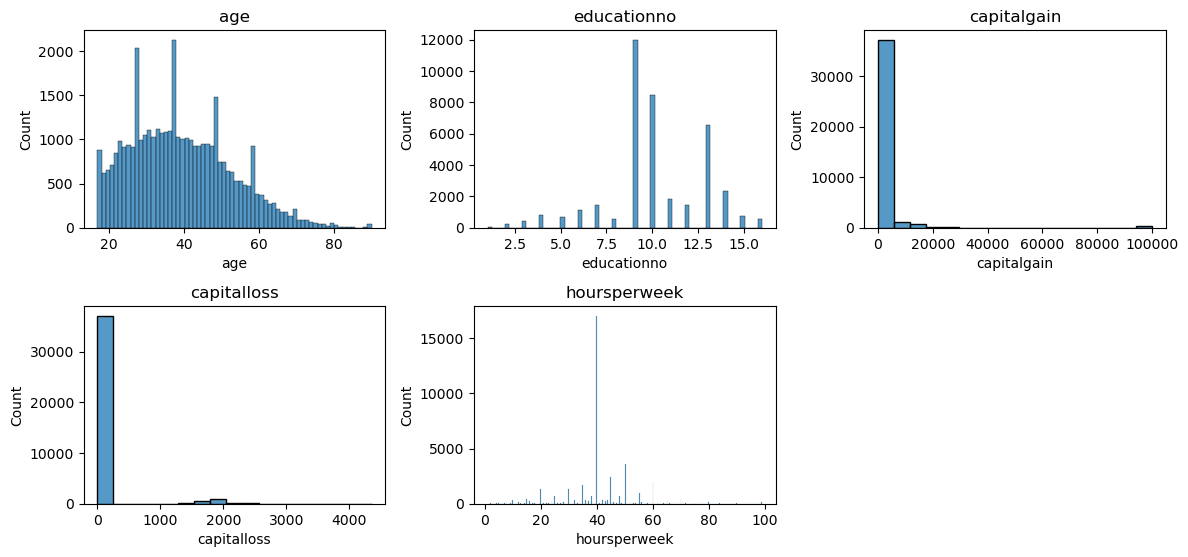

In [17]:
# Univariate Analysis
plt.figure(figsize=(12, 8))
for i, col in enumerate(combined_data.select_dtypes(include=['int64'])):
    plt.subplot(3, 3, i+1)
    sns.histplot(combined_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

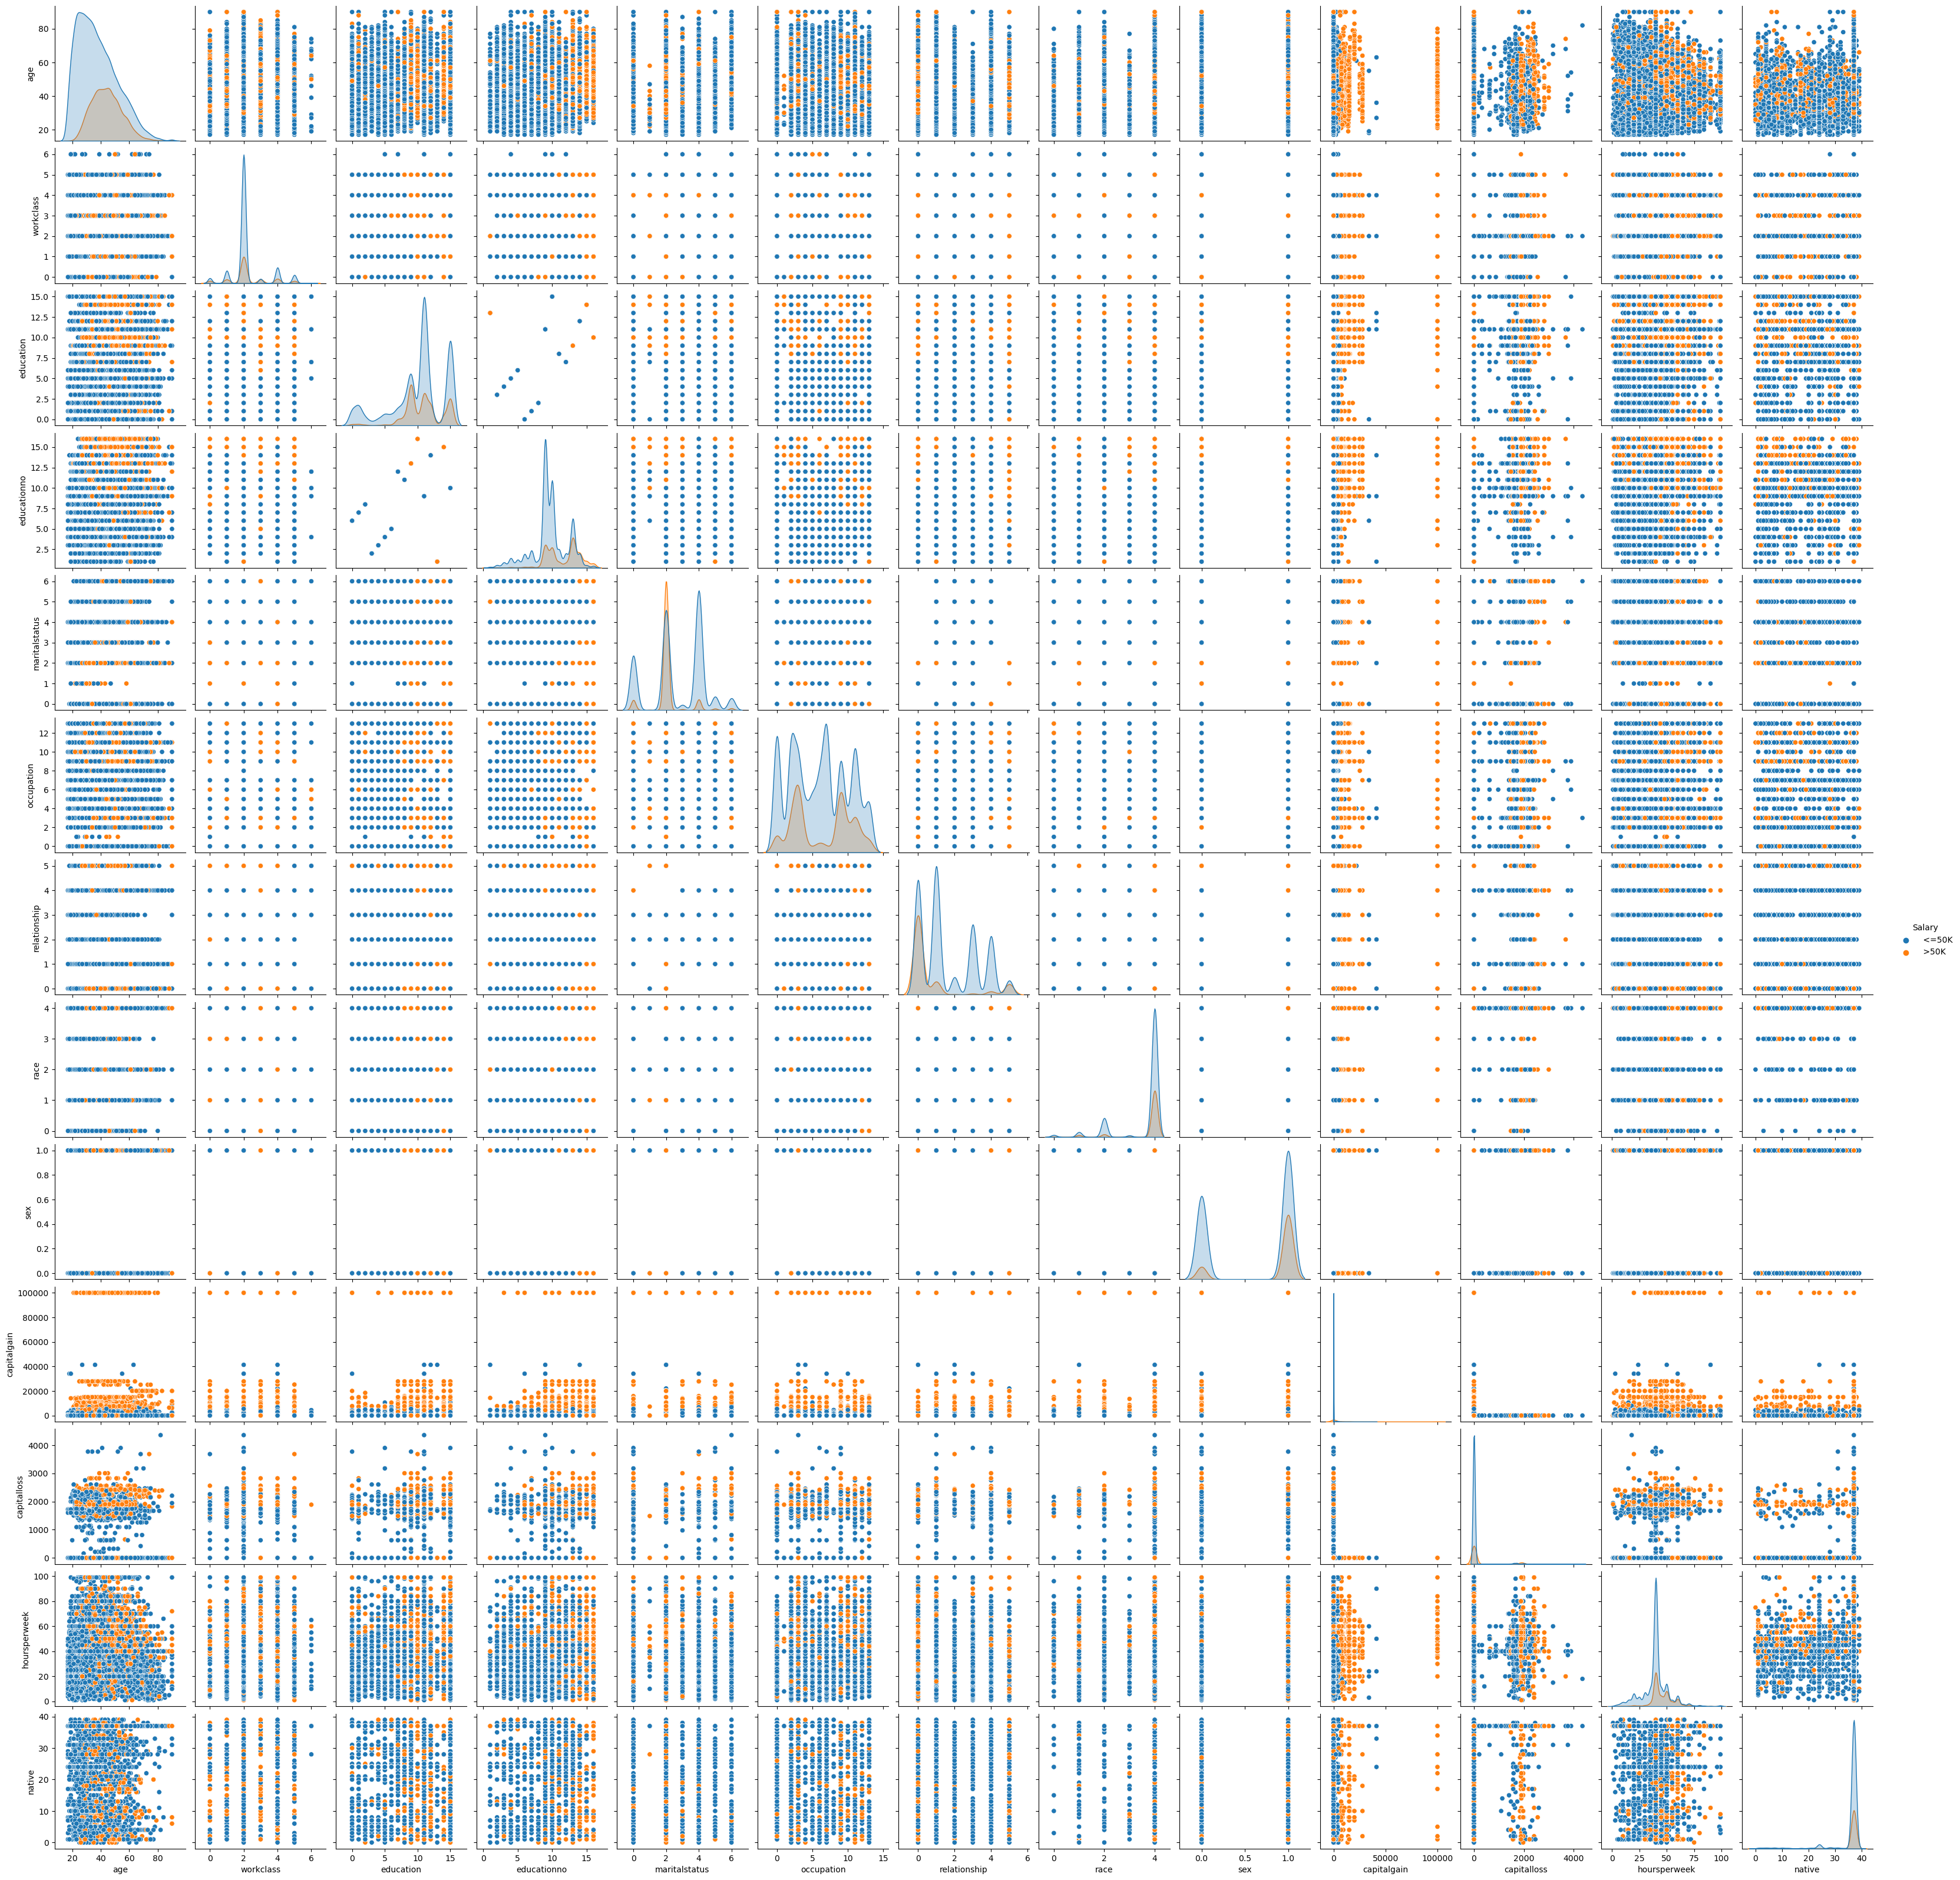

In [18]:
# Bivariate Analysis
sns.pairplot(combined_data, hue='Salary', diag_kind='kde')
plt.show()

In [18]:
train_data = combined_data[:sal_train.shape[0]]
test_data = combined_data[sal_train.shape[0]:]

In [19]:
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']
X_test = test_data.drop('Salary', axis=1)
y_test = test_data['Salary']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# SVC Linear Method

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [23]:
y_pred = svm_classifier.predict(X_test_scaled)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8074465741352721


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      6807
        >50K       0.76      0.33      0.46      2271

    accuracy                           0.81      9078
   macro avg       0.79      0.65      0.67      9078
weighted avg       0.80      0.81      0.78      9078



# KDF Method

In [27]:
combined_data['Salary'].value_counts()

 <=50K    29264
 >50K      9975
Name: Salary, dtype: int64

In [28]:
combined_data['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [29]:
 combined_data['Salary']=combined_data['Salary'].map({' <=50K':1,' >50K':0})

In [30]:
combined_data['Salary'].unique()

array([1, 0], dtype=int64)

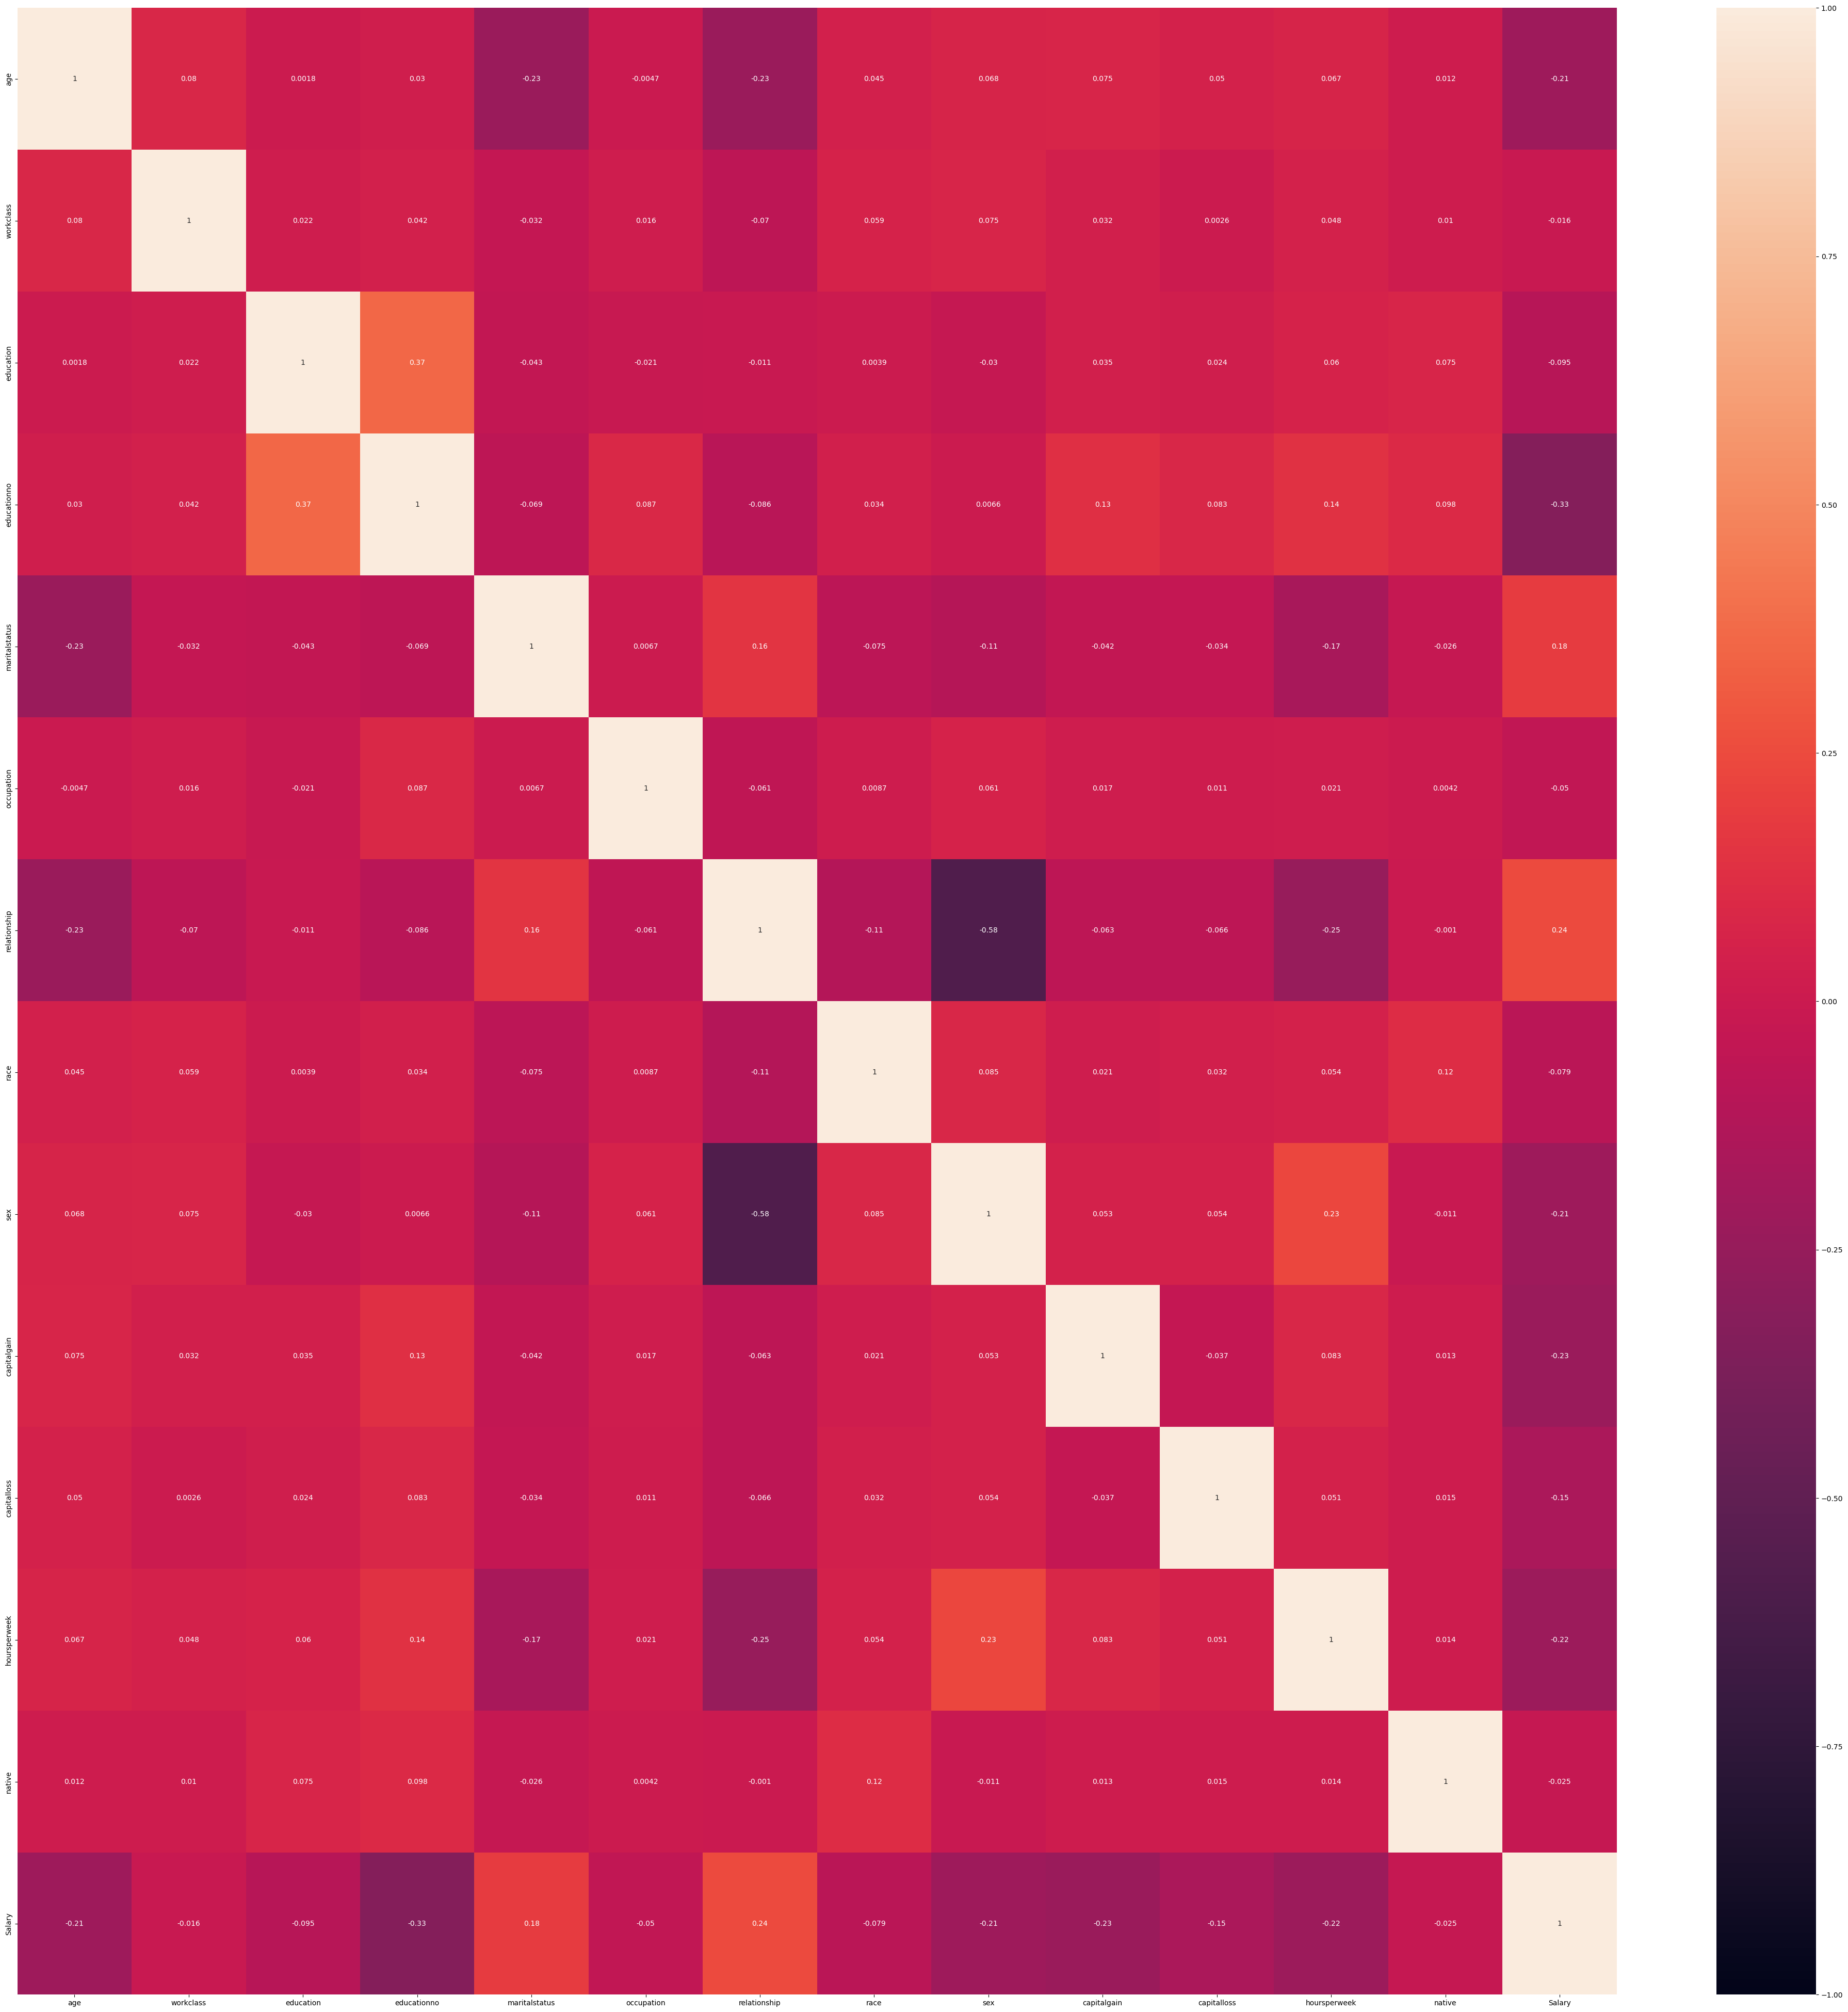

In [31]:
plt.figure(figsize = (50,50))
sns.heatmap(combined_data.corr(),vmin = -1,vmax = 1,annot = True)
plt.show()

In [32]:
x = combined_data.drop(['Salary'],axis = 1) 
y = combined_data['Salary']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)
logreg_train_pred = logreg_clf.predict(X_train)
print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))
print(confusion_matrix(logreg_prediction, Y_test))
print(classification_report(logreg_prediction, Y_test))

Accuracy 79.71%
Accuracy 79.88%
[[1068  446]
 [1922 8336]]
              precision    recall  f1-score   support

           0       0.36      0.71      0.47      1514
           1       0.95      0.81      0.88     10258

    accuracy                           0.80     11772
   macro avg       0.65      0.76      0.67     11772
weighted avg       0.87      0.80      0.82     11772



In [35]:
ranfor_clf = RandomForestClassifier(n_estimators=50,max_depth = 5,max_features=7)
ranfor_model = ranfor_clf.fit(X_train, Y_train)
ranfor_prediction = ranfor_clf.predict(X_test)
ranfor_train_pred = ranfor_clf.predict(X_train)
print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Accuracy 84.47%
Accuracy 85.07%
[[1622  389]
 [1368 8393]]
              precision    recall  f1-score   support

           0       0.54      0.81      0.65      2011
           1       0.96      0.86      0.91      9761

    accuracy                           0.85     11772
   macro avg       0.75      0.83      0.78     11772
weighted avg       0.89      0.85      0.86     11772



In [36]:
svm_clf = SVC(C=2.0,
    kernel='rbf',
    degree=5,
    gamma='scale',
    coef0=0.1,)
svm_model = svm_clf.fit(X_train, Y_train)
svm_prediction = svm_clf.predict(X_test)
svm_train_pred = svm_clf.predict(X_train)
print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, Y_test)))
print(confusion_matrix(svm_prediction, Y_test))
print(classification_report(svm_prediction, Y_test))

Accuracy 79.59%
Accuracy 79.52%
[[ 890  311]
 [2100 8471]]
              precision    recall  f1-score   support

           0       0.30      0.74      0.42      1201
           1       0.96      0.80      0.88     10571

    accuracy                           0.80     11772
   macro avg       0.63      0.77      0.65     11772
weighted avg       0.90      0.80      0.83     11772



# RandomizedSearchCV 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

In [28]:
df = pd.read_csv("../Assignment 17-Support Vector Machines/SalaryData_Train.csv")

In [29]:
## Passes only 1000 samples as its taking too long time to perform Randomised search.

In [30]:
# Sample 100 records from the dataset
df_subset = df.sample(n=1000, random_state=42)

In [31]:
df_subset

age     workclass      education  educationno           maritalstatus  \
217     28       Private    Prof-school           15           Never-married   
24912   41       Private        HS-grad            9      Married-civ-spouse   
17780   53       Private        HS-grad            9      Married-civ-spouse   
12484   31       Private        HS-grad            9      Married-civ-spouse   
8890    34     Local-gov      Bachelors           13   Married-spouse-absent   
...    ...           ...            ...          ...                     ...   
20243   33   Federal-gov   Some-college           10                Divorced   
10783   36       Private      Assoc-voc           11           Never-married   
20371   70       Private        HS-grad            9                Divorced   
17604   31     Local-gov      Bachelors           13           Never-married   
20179   66       Private   Some-college           10      Married-civ-spouse   

            occupation    relationship                 race      sex  \
217     Prof-specialty   Not-in-family                White     Male   
24912     Craft-repair         Husband   Asian-Pac-Islander     Male   
17780    Other-service         Husband                White     Male   
12484     Craft-repair         Husband                White     Male   
8890    Prof-specialty   Not-in-family                White   Female   
...                ...             ...                  ...      ...   
20243    Other-service   Not-in-family                Black     Male   
10783   Prof-specialty       Unmarried                Black   Female   
20371    Other-service   Not-in-family                White   Female   
17604   Prof-specialty   Not-in-family                White   Female   
20179            Sales         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
217              0            0            55   United-States    >50K  
24912            0            0            40          Taiwan   <=50K  
17780            0            0            50         Germany    >50K  
12484            0            0            45   United-States   <=50K  
8890             0            0            40   United-States   <=50K  
...            ...          ...           ...             ...     ...  
20243            0            0            40   United-States   <=50K  
10783            0            0            38   United-States   <=50K  
20371            0            0            28   United-States   <=50K  
17604            0            0            50   United-States   <=50K  
20179            0            0            24   United-States   <=50K  

[1000 rows x 14 columns]

In [32]:
# For simplicity, let's encode categorical variables using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [33]:
label_encoder = LabelEncoder()
df_subset['workclass_encoded'] = label_encoder.fit_transform(df_subset['workclass'])
df_subset['education_encoded'] = label_encoder.fit_transform(df_subset['education'])
df_subset['maritalstatus_encoded'] = label_encoder.fit_transform(df_subset['maritalstatus'])
df_subset['relationship_encoded'] = label_encoder.fit_transform(df_subset['relationship'])
df_subset['race_encoded'] = label_encoder.fit_transform(df_subset['race'])
df_subset['sex_encoded'] = label_encoder.fit_transform(df_subset['sex'])
df_subset['native_encoded'] = label_encoder.fit_transform(df_subset['native'])

In [34]:
# Separate features and target variable
X = df_subset.drop(columns=['Salary','workclass','native','education','maritalstatus','relationship','race','sex','occupation'])
y = df_subset['Salary']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Define the SVM model
svm = SVC()

In [37]:
# Define the hyperparameter distributions for randomized search
param_distributions = {
    'C': randint(1, 100),  # Randomly sample from integers between 1 and 100
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(2, 6)  # Randomly sample from integers between 2 and 5 (inclusive)
}

# Define the hyperparameter distributions
param_distributions = {
    'C': uniform(loc=0.01, scale=2),  # Continuous uniform distribution between 0.01 and 2
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(2, 6)  # Discrete uniform distribution between 2 and 5 (inclusive)
}

In [38]:
# Choose the search method (RandomizedSearchCV)
random_search = RandomizedSearchCV(svm, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)

In [39]:
#we will not use this as its taking time to search each Define the hyperparameter grid
param_grid = {
    'C': [1, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]  # Only for polynomial kernel
}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#Choose the search method (GridSearchCV)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

In [42]:
X_train

age  educationno  capitalgain  capitalloss  hoursperweek  \
19752   19           10            0            0            10   
15211   33            8            0            0            32   
1923    31            9            0            0            40   
23763   22            8            0            0            40   
8145    24            9            0            0            30   
...    ...          ...          ...          ...           ...   
18805   19            9            0            0            30   
10930   23            9            0            0            45   
17115   44            7            0            0            30   
4974    29           14            0            0            36   
18102   39            9            0         1977            40   

       workclass_encoded  education_encoded  maritalstatus_encoded  \
19752                  2                 14                      4   
15211                  4                  2                      4   
1923                   0                 11                      2   
23763                  2                  2                      4   
8145                   2                 11                      2   
...                  ...                ...                    ...   
18805                  2                 11                      4   
10930                  2                 11                      2   
17115                  2                  1                      5   
4974                   5                 12                      2   
18102                  3                 11                      2   

       relationship_encoded  race_encoded  sex_encoded  native_encoded  
19752                     3             4            0              26  
15211                     1             2            1              26  
1923                      5             4            0              26  
23763                     3             0            1              26  
8145                      5             4            0              26  
...                     ...           ...          ...             ...  
18805                     1             4            1              26  
10930                     0             4            1              26  
17115                     4             2            0              26  
4974                      0             4            1              26  
18102                     0             4            1              26  

[800 rows x 12 columns]

In [43]:
# Perform randomized search
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000205C6336850>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000205C6336110>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy')

In [46]:
# Perform grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 100], 'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [45]:
# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Best hyperparameters:", random_search.best_params_)

Accuracy: 0.8
Best hyperparameters: {'C': 64, 'degree': 5, 'kernel': 'linear'}


In [47]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Best hyperparameters:", grid_search.best_params_)

Accuracy: 0.81
Best hyperparameters: {'C': 1, 'degree': 2, 'kernel': 'linear'}
